In [100]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [101]:
data_train = pd.read_csv("train.csv")
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [102]:
data_train.replace(["female", "male"], [0, 1], inplace=True)
data_train.fillna(0, inplace=True)

C:\Users\kiyak\AppData\Local\Temp\ipykernel_1220\561298669.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train.replace(["female", "male"], [0, 1], inplace=True)


In [103]:
data_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
data_train['Age'].fillna(29.5,inplace=True)

data_train.isnull().sum()

C:\Users\kiyak\AppData\Local\Temp\ipykernel_1220\3938871066.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['Age'].fillna(29.5,inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [105]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,C


In [106]:
X_train = np.array(data_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]])
Y_train = np.array(data_train[["Survived"]])

In [107]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(6, "sigmoid"), # input layer
#     tf.keras.layers.Dense(128, "relu"),   # hidden layer 1
#     tf.keras.layers.Dense(23, "sigmoid"), # hidden layer 2
#     tf.keras.layers.Dense(2, "softmax"), # output layer
# ])

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(320, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [108]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [109]:
output = model.fit(X_train, Y_train, epochs=256)

Epoch 1/256


28/28 [==============================] - 1s 4ms/step - loss: 0.9125 - accuracy: 0.5589
Epoch 2/256
28/28 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.6274
Epoch 3/256
28/28 [==============================] - 0s 4ms/step - loss: 0.6784 - accuracy: 0.6510
Epoch 4/256
28/28 [==============================] - 0s 4ms/step - loss: 0.6352 - accuracy: 0.6667
Epoch 5/256
28/28 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.6487
Epoch 6/256
28/28 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.6577
Epoch 7/256
28/28 [==============================] - 0s 5ms/step - loss: 0.6773 - accuracy: 0.6352
Epoch 8/256
28/28 [==============================] - 0s 4ms/step - loss: 0.6322 - accuracy: 0.6543
Epoch 9/256
28/28 [==============================] - 0s 4ms/step - loss: 0.6220 - accuracy: 0.6712
Epoch 10/256
28/28 [==============================] - 0s 4ms/step - loss: 0.6175 - accuracy: 0.6678
Epoch 11/256
28/28 [=

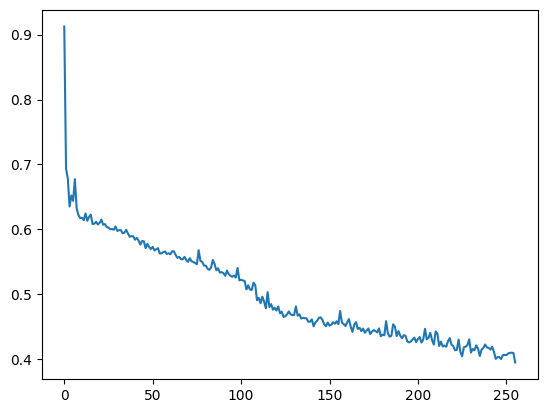

In [110]:
plt.plot(output.history["loss"])
plt.show()

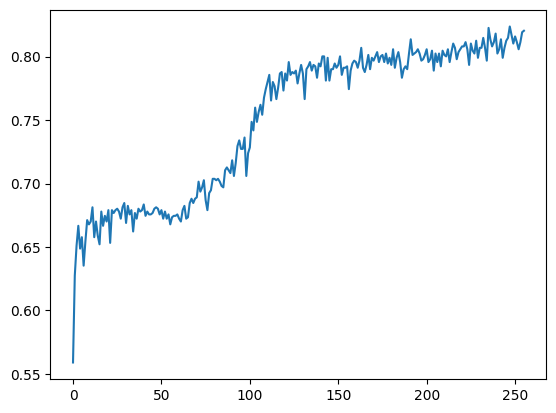

In [111]:
plt.plot(output.history["accuracy"])
plt.show()

In [112]:
data_test = pd.read_csv("test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [113]:
data_test_survive = pd.read_csv('gender_submission.csv')
data_test_survive.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [114]:
Y_test = data_test_survive[["Survived"]]

In [115]:
data_test.replace(["female" , "male"] , [0 , 1] , inplace=True)
data_test.fillna(0 , inplace=True)
data_test = data_test.drop(["Name" , "Ticket" , "Cabin" , "Embarked"], axis=1)

X_test = np.array(data_test[["Pclass" , "Sex" , "Age" , "SibSp" , "Parch" , "Fare"]])

C:\Users\kiyak\AppData\Local\Temp\ipykernel_1220\415138760.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test.replace(["female" , "male"] , [0 , 1] , inplace=True)


In [116]:
model.evaluate(X_test, Y_test)

14/14 [==============================] - 0s 3ms/step - loss: 0.3197 - accuracy: 0.8900


[0.3196970820426941, 0.8899521827697754]

In [117]:
Jack_Dawson = [3, 1, 19, 0, 0, 5.0000]
Rose_DeWitt_Bukater = [1, 0, 17, 1, 2, 100.0000]

pred_jack = model.predict([Jack_Dawson])
pred_rose = model.predict([Rose_DeWitt_Bukater])

print("Jack Surviving Rate:", pred_jack[0][1])
print("Rose Surviving Rate:", pred_rose[0][1])

1/1 [==============================] - 0s 51ms/step
Jack Surviving Rate: 0.16574207
Rose Surviving Rate: 0.9303552
